In [123]:
import pandas as pd
from functions import baza_danych_projektowych_to_csv

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

baza_danych_projektowych_to_csv()
# Import database from excel sheet. It is organized in columns [variable | unit | symbol | value]
# You can set index col (you can take symbol for cleaner formulas)


# df8 = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="Baze", index_col="index")
# df8 = df8[17:36]
plane_prop= pd.read_csv("../../database/plane_properties.csv", index_col="Dana")
# display(df.head(10))
# df8.columns

# plane_prop[""]




In [124]:
plane_prop.at["Lambda", "Wartość"]

6.59

In [125]:

def get_prop(variable:str)->float: 
    return float(plane_prop.at[variable, "Wartość"])



### importowanie wartości

In [126]:
from  math import pi
kghn = get_prop("kghn")
kghn_prim = get_prop("kghn'")
kghm = get_prop("kghm")
kghm_prim = get_prop("kghm'")

mu = get_prop("mu")
kappa_h = get_prop("kappa'_h")

lamda = get_prop("Lambda")
a = get_prop("a")
alpha_0 = get_prop("alpha_0")  

a1 = get_prop("a1")
a2 = get_prop("a2")

b1 = get_prop("b1")
b2 = get_prop("b2")

depsdalpha = get_prop("deps_dalpha")

zs = get_prop("bar_zs")

xsaj = get_prop("xsaj")

xsa = get_prop("bar_xsa")

def get_cz(V:float)->float:
    
    mass=get_prop("mtow") - 50
    g = 9.81
    rho = 1.225
    S = get_prop("S")
    
    return mass*g/(1/2*rho*V**2*S)





In [127]:
def get_zs(cz):
    return zs*(2*cz*(1/(pi *lamda) - 1/a) - alpha_0)

def kappa_a1a():
    return kappa_h*a1/a

def a2b1():
    return 1- a2*b1/(a1*b2)

def partials():
    return 1-depsdalpha

def xn(cz):
    return (xsa + xsaj + get_zs(cz) + kappa_a1a()*partials())*kghn

def xn_p(cz): 
    return (xsa + xsaj + get_zs(cz) + kappa_a1a()*partials()*a2b1())*kghn_prim

def xm(cz):
    return (xsa + xsaj + get_zs(cz) + kappa_a1a()*(partials()+a/mu))*kghm

def xm_p(cz):
    return (xsa + xsaj + get_zs(cz) + kappa_a1a()*a2b1()*(partials()+a/mu))*kghm_prim

In [128]:
import numpy as np
import matplotlib.pyplot as plt

v = np.linspace(20, 90, 20)
cz = get_cz(v)

tabelka_1 = pd.DataFrame(columns=["$V$", "$C_z$", "$x_n$", "$x_n'$", "$x_m$", "$x_m'$"]) 
tabelka_1["$V$"] = v
tabelka_1["$C_z$"] = cz
tabelka_1["$x_n$"] = tabelka_1["$C_z$"].apply(xn)
tabelka_1["$x_n'$"] = tabelka_1["$C_z$"].apply(xn_p)
tabelka_1["$x_m$"] = tabelka_1["$C_z$"].apply(xm)
tabelka_1["$x_m'$"] = tabelka_1["$C_z$"].apply(xm_p)

tabelka_1.round(3)

# rename $V$ to $V$ [m/s]$
tabelka_1.rename(columns={"$V$": "$V$ [m/s]"}, inplace=True)

with open("../latex_raport/tabelka_1.tex", "w") as f:
    f.write(tabelka_1.round(3).to_latex(index=False, escape=False))

C:\Users\marek\AppData\Local\Temp\ipykernel_2332\3203906785.py:21: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(tabelka_1.round(3).to_latex(index=False, escape=False))


### wykresy funkcji

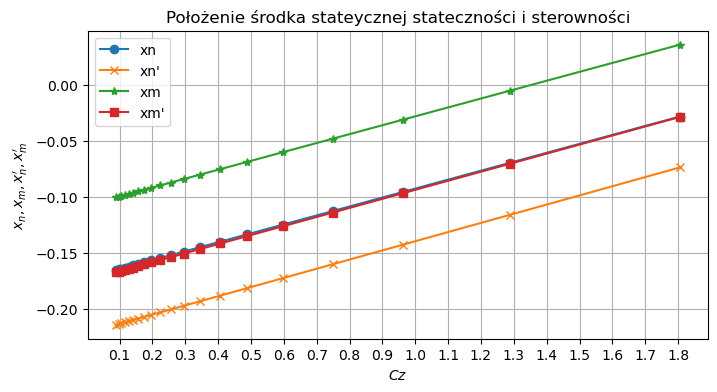

In [129]:
fig, ax = plt.subplots(figsize=(8, 4))

# create above plots but with different markers
ax.plot(cz, xn(cz), label="xn", marker="o")
ax.plot(cz, xn_p(cz), label="xn'", marker="x")
ax.plot(cz, xm(cz), label="xm", marker="*")
ax.plot(cz, xm_p(cz), label="xm'", marker="s")

ax.set_xlabel("$Cz$")
ax.set_ylabel("$x_n, x_m, x_n', x_m'$") 

ax.set_title("Położenie środka stateycznej stateczności i sterowności")

ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.legend()
ax.grid()

plt.savefig("../latex_raport/imgs/xn_cz.png", dpi = 200)



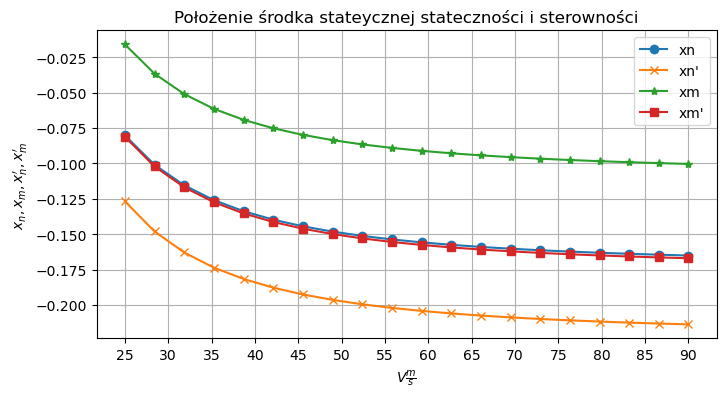

In [130]:
import numpy as np
import matplotlib.pyplot as plt


v = np.linspace(25, 90, 20)
cz = get_cz(v)

fig, ax = plt.subplots(figsize=(8, 4))

# create above plots but with different markers
ax.plot(v, xn(cz), label="xn", marker="o")
ax.plot(v, xn_p(cz), label="xn'", marker="x")
ax.plot(v, xm(cz), label="xm", marker="*")
ax.plot(v, xm_p(cz), label="xm'", marker="s")

ax.set_xlabel("$V \\frac{m}{s}$")
ax.set_ylabel("$x_n, x_m, x_n', x_m'$") 

ax.set_title("Położenie środka stateycznej stateczności i sterowności")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.legend()
ax.grid()

plt.savefig("../latex_raport/imgs/xn_v.png", dpi = 200)



### wykresy zapasu

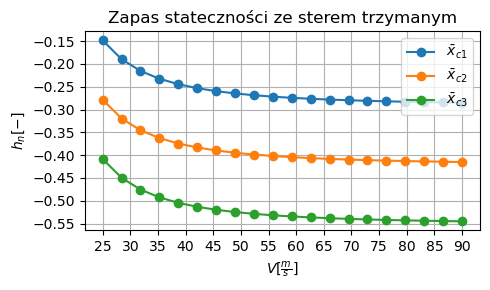

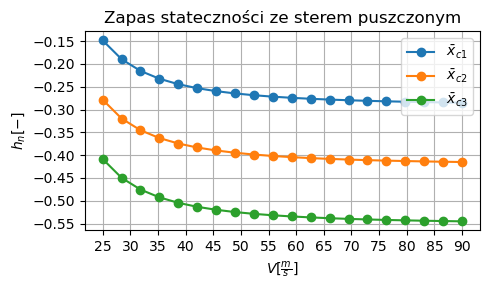

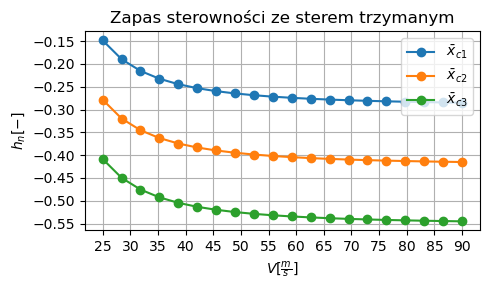

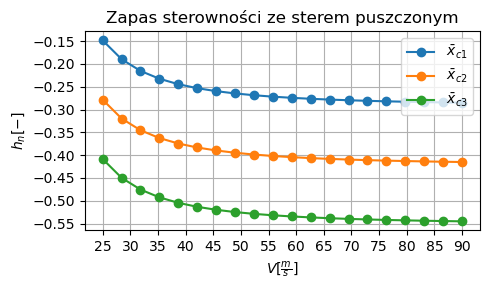

In [131]:
l1 = ["Zapas stateczności ze sterem trzymanym",
"Zapas stateczności ze sterem puszczonym",
"Zapas sterowności ze sterem trzymanym",
"Zapas sterowności ze sterem puszczonym"]

l2 = [xn(cz), xn_p(cz), xm(cz), xm_p(cz)]

xc = [get_prop("bx_c1"), get_prop("bx_c2"), get_prop("bx_c3")] 
xc_names = ["$\\bar x_{c1}$", "$\\bar x_{c2}$", "$\\bar x_{c3}$"]

for i, x in enumerate(xc):
    # name = "h_{i}"
    tabelka_1[f"h_n{i+1}"] = tabelka_1["$C_z$"].apply(xn) - xc[i]
    tabelka_1[f"h_n{i+1}_p"] = tabelka_1["$C_z$"].apply(xn_p) - xc[i]
    
    tabelka_1[f"h_m{i+1}"] = tabelka_1["$C_z$"].apply(xm) - xc[i]
    tabelka_1[f"h_m{i+1}_p"] = tabelka_1["$C_z$"].apply(xm_p) - xc[i]

    


for i, (func, name) in enumerate(zip(l2, l1)):    
    fig, ax = plt.subplots(figsize=(5, 3))
    for j, (x, x_name) in enumerate(zip(xc, xc_names)):
        # ax.axhline(x, color="black", linestyle="--")
        ax.plot(v, tabelka_1[f'h_n{j+1}'], label=f"{x_name}", marker="o") 
    ax.grid(True)
    ax.legend()
    ax.set_xlabel("$V [\\frac{m}{s}]$")
    ax.set_ylabel("$h_n [-]$")
    ax.set_title(f"{name}")
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_major_locator(MultipleLocator(0.05))
    
    plt.tight_layout()
    plt.savefig(f"../latex_raport/imgs/hn_v{i+1}.png", dpi = 200)
        
        

### Obliczanie deltadh i deltapdh po dv

In [132]:
m = get_prop("m_calc")
S = get_prop("S")
kappa = get_prop("kappa'_h")
a2 = get_prop("a2")
rho = 1.225
g = 9.81

m = get_prop("m_calc")
S = get_prop("S")
kappa = get_prop("kappa'_h")
a2 = get_prop("a2")
rho = 1.225
g = 9.81

ssh = get_prop("Ssh")
csh = get_prop("śr.c_sh")

sh = get_prop("S_h")
xsah = get_prop("x_sah")

ca = get_prop("C_a")
ldh = get_prop("ldH")

kdh = get_prop("kdh")



def d_delta_h_dv(v, h_n):
    
    
    return 4*m*g /(rho*S*kappa*a2*v**3) * h_n

def d_pdh_dv(v, h_n):
    
    
    return -2*m*g * (ssh * csh)/(sh * xsah) * (ca)/(ldh) * 1/v* h_n
    

In [133]:
tabelka_1.columns

Index(['$V$ [m/s]', '$C_z$', '$x_n$', '$x_n'$', '$x_m$', '$x_m'$', 'h_n1',
       'h_n1_p', 'h_m1', 'h_m1_p', 'h_n2', 'h_n2_p', 'h_m2', 'h_m2_p', 'h_n3',
       'h_n3_p', 'h_m3', 'h_m3_p'],
      dtype='object')

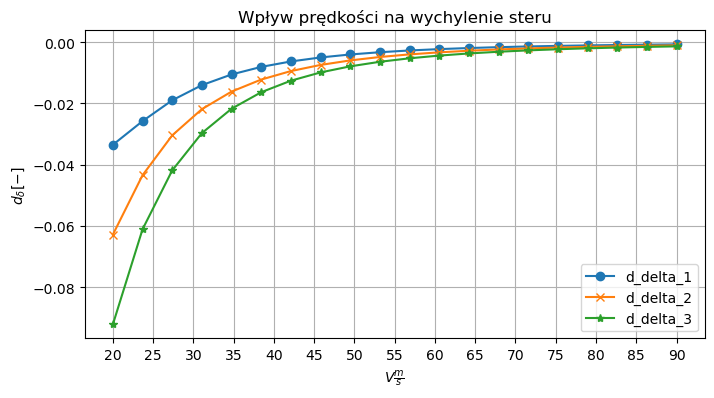

In [134]:
fig,ax = plt.subplots(figsize=(8, 4))


tabelka_1["d_delta_1"] = d_delta_h_dv(tabelka_1['$V$ [m/s]'], tabelka_1['h_n1'])
tabelka_1["d_delta_2"] = d_delta_h_dv(tabelka_1['$V$ [m/s]'], tabelka_1['h_n2'])
tabelka_1["d_delta_3"] = d_delta_h_dv(tabelka_1['$V$ [m/s]'], tabelka_1['h_n3'])

ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["d_delta_1"], label="d_delta_1", marker="o")
ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["d_delta_2"], label="d_delta_2", marker="x")
ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["d_delta_3"], label="d_delta_3", marker="*")

ax.set_xlabel("$V \\frac{m}{s}$")
ax.set_ylabel("$d_\\delta [-]$")
ax.set_title("Wpływ prędkości na wychylenie steru")
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.legend()
ax.grid()

plt.savefig("../latex_raport/imgs/d_delta_v.png", dpi = 200)    


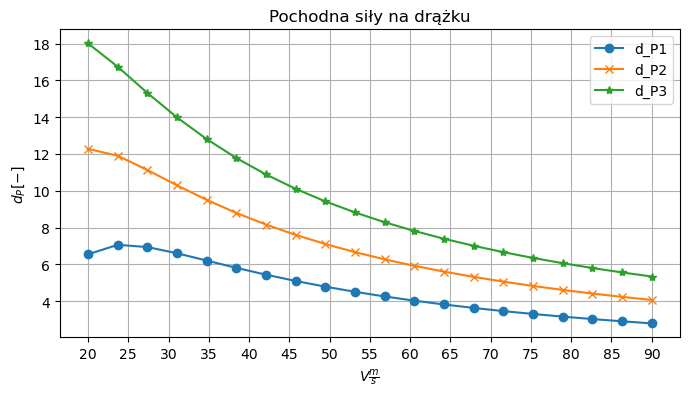

In [135]:
fig, ax = plt.subplots(figsize=(8, 4))

tabelka_1["d_P1"] = d_pdh_dv(tabelka_1['$V$ [m/s]'], tabelka_1['h_n1'])
tabelka_1["d_P2"] = d_pdh_dv(tabelka_1['$V$ [m/s]'], tabelka_1['h_n2'])
tabelka_1["d_P3"] = d_pdh_dv(tabelka_1['$V$ [m/s]'], tabelka_1['h_n3'])

ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["d_P1"], label="d_P1", marker="o")
ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["d_P2"], label="d_P2", marker="x")
ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["d_P3"], label="d_P3", marker="*")

ax.set_xlabel("$V \\frac{m}{s}$")
ax.set_ylabel("$d_P [-]$")
ax.set_title("Pochodna siły na drążku")
ax.xaxis.set_major_locator(MultipleLocator(5))

ax.legend()
ax.grid()

plt.savefig("../latex_raport/imgs/d_P_v.png", dpi = 200)

In [136]:
def delta_delta(v, h_m):
    return -2*m*g*ca /(rho*sh*xsah*a2*v**2) * h_m

def delta_p(v, h_m):
    return m*g*kdh * (ca)/(ldh) * (ssh*csh)/ (sh*xsah*b2/a2*v**2) * h_m

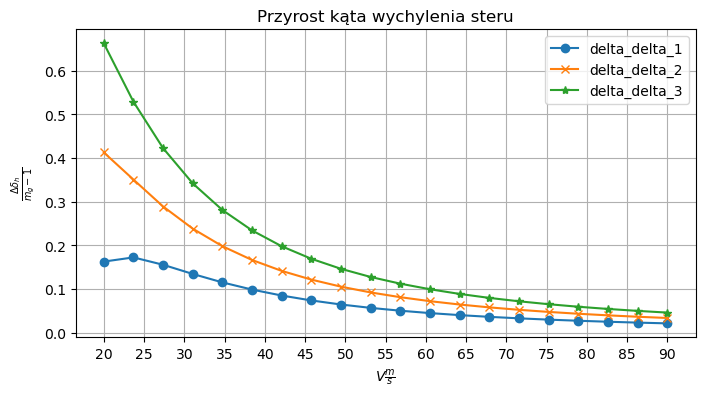

In [138]:
tabelka_1["delta_delta_1"] = delta_delta(tabelka_1['$V$ [m/s]'], tabelka_1['h_m1'])
tabelka_1["delta_delta_2"] = delta_delta(tabelka_1['$V$ [m/s]'], tabelka_1['h_m2'])
tabelka_1["delta_delta_3"] = delta_delta(tabelka_1['$V$ [m/s]'], tabelka_1['h_m3'])

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["delta_delta_1"], label="delta_delta_1", marker="o")
ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["delta_delta_2"], label="delta_delta_2", marker="x")  
ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["delta_delta_3"], label="delta_delta_3", marker="*")

ax.set_xlabel("$V \\frac{m}{s}$")
ax.set_ylabel("$\\frac{\Delta \delta_h}{m_g-1}$")
ax.set_title("Przyrost kąta wychylenia steru")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.legend()
ax.grid()

plt.savefig("../latex_raport/imgs/delta_delta_v.png", dpi = 200)


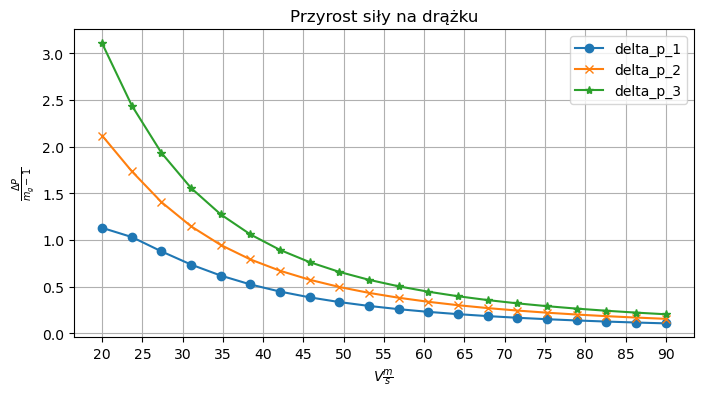

In [139]:
tabelka_1["delta_p_1"] = delta_p(tabelka_1['$V$ [m/s]'], tabelka_1['h_m1_p'])
tabelka_1["delta_p_2"] = delta_p(tabelka_1['$V$ [m/s]'], tabelka_1['h_m2_p'])
tabelka_1["delta_p_3"] = delta_p(tabelka_1['$V$ [m/s]'], tabelka_1['h_m3_p'])

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["delta_p_1"], label="delta_p_1", marker="o")
ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["delta_p_2"], label="delta_p_2", marker="x")
ax.plot(tabelka_1['$V$ [m/s]'], tabelka_1["delta_p_3"], label="delta_p_3", marker="*")

ax.set_xlabel("$V \\frac{m}{s}$")
ax.set_ylabel("$\\frac{\Delta P}{m_g-1}$")
ax.set_title("Przyrost siły na drążku")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.legend()
ax.grid()

plt.savefig("../latex_raport/imgs/delta_p_v.png", dpi = 200)
